# Project 1: fys-stk4155
## Part a) 
### (Kode fra oppgaveteksten)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

In [ ]:
# Need to make sure this works when y, y_hat and y_tilde are matrices.

# Creating a R2-square fuction:
def R2(y, y_predict):
    C = y-y_predict
    val = sum(sum((y-y_predict))**2)/sum(sum((y-np.mean(y))**2))
    return 1 - val

# Creating a mean square error function:
def MSE(y, y_predict):
    C = y-y_predict
    [n, m] = C.shape
    return sum(sum((C)**2))/(n*m)


def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [ ]:
def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)
print(z.shape)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
# Initializing X-matrix for fitting a polynomial of degree p 

np.random.seed(1000)
x = np.random.rand(20, )
y = np.random.rand(20, )
x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

x = np.random.rand(20, )
y = np.random.rand(20, ) 
  
X = generateDesignmatrix(p,x,y)

print(z.shape)
X

In [ ]:
"""
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()"""


# Test



In [ ]:
import numpy as np
import algorithms
from model_selection import GridSearch #use Gridsearch.fit(x,y)
from model_comparison import model_comparison

In [ ]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

In [ ]:
z.shape

In [ ]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
#
# split_size: Dividing into 20 % test data and 80 % train data.
# 
# TODO: Add scoring kwargs ('mse', 'r2')
results = model_comparison(
    models, param_grid, X, z, split_size=0.2
)

In [ ]:
results

In [ ]:
from model_selection_new import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison_new import model_comparison_new
results = model_comparison_new(
    models, param_grid, X, z, split_size=0.2
)

In [ ]:
X.shape

In [ ]:
results

In [ ]:
# Plotting:
# for each model (subplots?) plot training scores vs test scores
# train scores >> test scores => overfitting
# low train scores => biased: coudl mean bad data or too much regularization 
# Validation curve (must include np.std(predicted scores))

# Digital Elevation Model

In [ ]:
from imageio import imread
import matplotlib.pyplot as plt
# Load the terrain
terrain_flekkefjord = imread('Flekkefjord.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
terrain_flekkefjord.shape

In [ ]:
# subset terrain_flekkefjord (we want a squared matrix, and x!=y)

In [ ]:
terrain_flekkefjord = terrain_flekkefjord[0:1801, ]
terrain_flekkefjord.shape

In [ ]:
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
x = np.linspace(1, 1801, num=1801)
print(type(x))
y = np.linspace(1+10, 1801+10, num=1801)
x = np.squeeze(np.tile(x,[1,1801] ))
y = np.squeeze(np.tile(y,[1,1801] ))
print(type(x))
print(x.shape)
z = np.ndarray.flatten(terrain_flekkefjord)
p = 2
X = generateDesignmatrix(p,x,y)


In [ ]:
results_flekkefjord = model_comparison_new(
    models, param_grid, X, z, split_size=0.2
)

# Hanna testing new

In [18]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0


In [2]:
def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [3]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 4 # [1:5]

X = generateDesignmatrix(p,x,y)

In [4]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.001, 0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
#
# split_size: Dividing into 20 % test data and 80 % train data.
# 
# TODO: Add scoring kwargs ('mse', 'r2')
results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
)

Testing model: ridge
Testing model: ols
Testing model: lasso


In [5]:
results['mse']

{'ridge': [[0.004103395803312588,
   0.006864828915362106,
   0.008835139056340485,
   0.013279683258166424,
   0.021614898450121912]],
 'lasso': [[0.013470790796861839,
   0.023586365702557295,
   0.08241004623695133,
   0.08241004623695133,
   0.08241004623695133]],
 'ols': [[0.0037104392341302628]]}

In [6]:
results["r2"]

{'ridge': [[0.9501753915198192,
   0.9166452788407053,
   0.8927212081284608,
   0.8387542779702576,
   0.73754570501174]],
 'lasso': [[0.836433795435908,
   0.7136075843203864,
   -0.000646412241043004,
   -0.000646412241043004,
   -0.000646412241043004]],
 'ols': [[0.954946782861941]]}

In [7]:
results["mse"]["lasso"][0]

[0.013470790796861839,
 0.023586365702557295,
 0.08241004623695133,
 0.08241004623695133,
 0.08241004623695133]

In [8]:
# merge this file into master

Plot mse vs. lambda

The polynomial order is: 1
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 2
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 3
Testing model: ridge
Testing model: ols
Testing model: lasso


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


The polynomial order is: 4
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 5
Testing model: ridge
Testing model: ols
Testing model: lasso


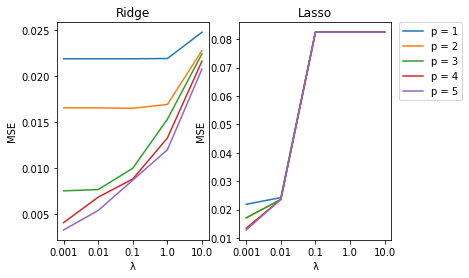

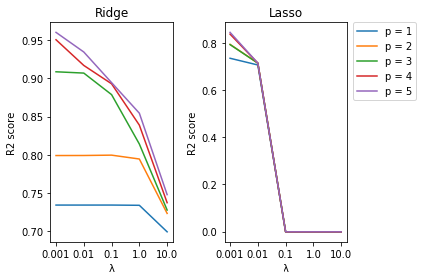

In [10]:
import matplotlib.pyplot as plt
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    
    
    # write loop instead of repeating code!!!
    
    # One figure for MSE and all pol. orders
    
    # Subplot for ridge
    plt.figure(1)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # One figure for R2 and all pol. orders
    # Subplot for ridge
    plt.figure(2)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["r2"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["r2"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('R2 score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()    
plt.show()
    
    

c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'r

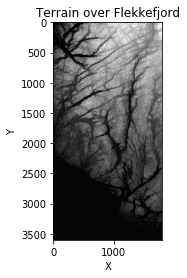

In [11]:
from imageio import imread
import matplotlib.pyplot as plt
# Load the terrain
terrain_flekkefjord = imread('Flekkefjord.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Flekkefjord')
plt.imshow(terrain_flekkefjord, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [12]:
terrain_flekkefjord = terrain_flekkefjord[0:180,0:180 ]
terrain_flekkefjord.shape

(180, 180)

In [13]:
x = np.linspace(1, 180, num=180)
print(type(x))
y = np.linspace(1+80, 180+80, num=180)
x = np.squeeze(np.tile(x,[1,180] ))
y = np.squeeze(np.tile(y,[1,180] ))
print(type(x))
print(x.shape)
z = np.ndarray.flatten(terrain_flekkefjord)
p = 2
X = generateDesignmatrix(p,x,y)
X

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(32400,)


array([[1.0000e+00, 1.0000e+00, 8.1000e+01, 1.0000e+00, 8.1000e+01,
        6.5610e+03],
       [1.0000e+00, 2.0000e+00, 8.2000e+01, 4.0000e+00, 1.6400e+02,
        6.7240e+03],
       [1.0000e+00, 3.0000e+00, 8.3000e+01, 9.0000e+00, 2.4900e+02,
        6.8890e+03],
       ...,
       [1.0000e+00, 1.7800e+02, 2.5800e+02, 3.1684e+04, 4.5924e+04,
        6.6564e+04],
       [1.0000e+00, 1.7900e+02, 2.5900e+02, 3.2041e+04, 4.6361e+04,
        6.7081e+04],
       [1.0000e+00, 1.8000e+02, 2.6000e+02, 3.2400e+04, 4.6800e+04,
        6.7600e+04]])

In [14]:
# Experimental setup
# Don't use alpha=0.001 because it can cause precision problems

results_flekkefjord =  model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )

Testing model: ridge
Testing model: ols
Testing model: lasso


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [15]:
results_flekkefjord['mse']

{'ridge': [[8392.750414761782,
   8393.050855328649,
   8393.04757116414,
   8393.046395168547,
   8393.046550107521]],
 'lasso': [[8393.046778812717,
   8393.048691217695,
   8393.067920733109,
   8393.270762449058,
   8396.353835792122]],
 'ols': [[174505.6846397497]]}

The polynomial order is: 1
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 2
Testing model: ridge
Testing model: ols
Testing model: lasso


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


The polynomial order is: 3
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 4
Testing model: ridge
Testing model: ols
Testing model: lasso
The polynomial order is: 5
Testing model: ridge
Testing model: ols
Testing model: lasso


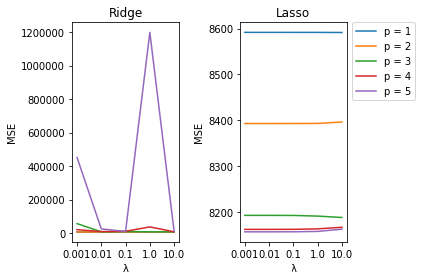

In [17]:
import matplotlib.pyplot as plt
for p in np.arange(1,6,1):
    print('The polynomial order is:', p)
    X = generateDesignmatrix(p,x,y)
    
    results = model_comparison0(
    models, param_grid, X, z, split_size=0.2
    )
    
    # One figure for MSE and all pol. orders
    
    # Subplot for ridge
    plt.figure(1)
    plt.subplot(121)
    # log x-axis
    xlogr = np.log10(param_grid['ridge'])
    plt.plot(xlogr, results["mse"]["ridge"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogr))
    ax.set_xticklabels(param_grid['ridge'])
    ax.set_title("Ridge")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.subplot(122)
    # log x-axis
    xlogl = np.log10(param_grid['lasso'])
    plt.plot(xlogl, results["mse"]["lasso"][0], label='p = %s' % p) # plot ridge
    ax = plt.gca()
    plt.xticks(np.asarray(xlogl))
    ax.set_xticklabels(param_grid['lasso'])
    ax.set_title("Lasso")
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()    
plt.show()
    